In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

In [3]:
def convert_image_to_tensor(path):
    #opens image from the given path and automatically comes in array format
    img = Image.open(path).convert("RGB")
    # rescale to 256 x 256 size
    img = img.resize([128,128])
    #convert to numpy array
    img = np.asarray(img, dtype=np.float32)/255.0
    return img

In [4]:
images_list = []
labels_list = []
labels_map = {}
label_val = 0
base_dir = 'data'
for folder in os.listdir(base_dir):
    labels_map[label_val] = folder
    for file in os.listdir(base_dir+'/'+folder):
        images_list.append(base_dir+'/'+folder+'/'+file)
        labels_list.append(label_val)
    label_val +=1

In [5]:
layers = tf.keras.layers.CategoryEncoding(num_tokens=len(list(set(labels_list))), output_mode="one_hot")
labels_list = np.array(layers(labels_list))
images_list = np.array([convert_image_to_tensor(i) for i in images_list])

d:\fnclick\python\ml\dog-cat-identification\env\Lib\site-packages\PIL\TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [6]:
x, xtest, y, ytest = train_test_split(images_list, labels_list, test_size=0.2, random_state=42)

In [7]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from keras import Sequential

In [8]:
model = Sequential()
model.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation=tf.keras.activations.relu,
    input_shape=(128,128,3)
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides = 2,
))
model.add(Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation=tf.keras.activations.relu,
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides = 2,
))
model.add(Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation=tf.keras.activations.relu,
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides = 2,
))
model.add(Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation=tf.keras.activations.relu,
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides = 2,
))

model.add(Flatten())
model.add(Dense(
    units = 512,
    activation = tf.keras.activations.relu,
))
model.add(BatchNormalization())
model.add(Dense(
    units = 512,
    activation = tf.keras.activations.relu,
))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(
    units = 512,
    activation = tf.keras.activations.relu,
))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(
    units = 2,
    activation = tf.keras.activations.softmax
))

d:\fnclick\python\ml\dog-cat-identification\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,805,890 (6.89 MB)

 Trainable params: 1,802,818 (6.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
res = model.fit(x, y, epochs=10, validation_data=(xtest, ytest))

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 66s 99ms/step - accuracy: 0.5839 - loss: 0.8249 - val_accuracy: 0.5739 - val_loss: 0.9931
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 58s 94ms/step - accuracy: 0.6940 - loss: 0.5901 - val_accuracy: 0.6456 - val_loss: 0.7387
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.7869 - loss: 0.4622 - val_accuracy: 0.7744 - val_loss: 0.4804
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8224 - loss: 0.3974 - val_accuracy: 0.8103 - val_loss: 0.4112
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.8380 - loss: 0.3597 - val_accuracy: 0.6817 - val_loss: 0.7447
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8582 - loss: 0.3250 - val_accuracy: 0.7905 - val_loss: 0.4633
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.8842 - loss: 0.2725 - val_accuracy: 0.8692 - val_loss: 0.3016
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.8977 - loss: 0.2429 - 

KeyError: 'epoch'

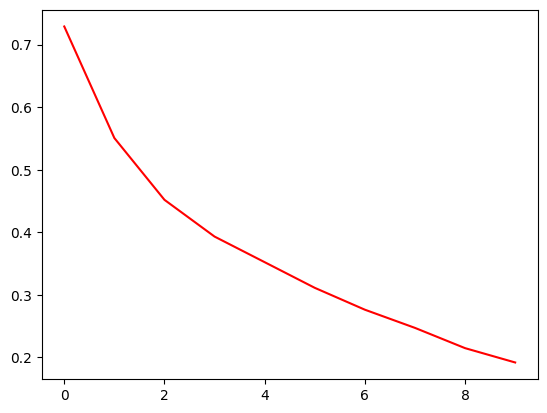

In [ ]:
plt.plot(res.history['loss'],color='red',label='train')
plt.plot(res.history['epoch'],color='blue',label='Epoch')
plt.legend()
plt.show()